# **Import Library**

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np


# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# **Data Load**

In [2]:
# load data to a new dataframe
df = pd.read_csv("data.csv")

# **Data Check**

In [3]:
# check the shape
df.dtypes

Nama                 object
WPM 1                 int64
WPM 2                 int64
WPM 3                 int64
Accuracy 1          float64
Accuracy 2          float64
Accuracy 3          float64
average_wpm         float64
average_accuracy    float64
second_1              int64
second_2              int64
second_3              int64
second_4              int64
second_5              int64
average_second      float64
dtype: object

In [4]:
# first five rows of the dataframe
df.head()

,Nama,WPM 1,WPM 2,WPM 3,Accuracy 1,Accuracy 2,Accuracy 3,average_wpm,average_accuracy,second_1,second_2,second_3,second_4,second_5,average_second
0,APS,63,61,57,1.0000,1.0000,0.9600,60.333333,0.9855,280,563,389,308,348,377.6
1,AP,41,44,38,0.9400,0.9700,0.9400,41.000000,0.9511,477,514,482,584,487,508.8
2,DAP,51,54,52,0.9400,0.9286,0.9509,52.333333,0.9400,537,653,456,584,572,560.4
3,DF,33,39,44,0.7000,0.9100,0.8200,38.666667,0.8120,241,303,360,398,301,320.6
4,DRF,20,28,36,0.8889,0.9545,1.0000,28.000000,1.0000,562,684,703,630,618,639.4


# **Membuat Dataframe Untuk Variabel**

In [5]:
# create a new simple dataframe using the existing one
new_df = df[['average_wpm', 'average_second']]
new_df

,average_wpm,average_second
0,60.333333,377.6
1,41.000000,508.8
2,52.333333,560.4
3,38.666667,320.6
4,28.000000,639.4
5,55.333333,732.4
6,47.333333,392.2
7,54.000000,403.4
8,59.666667,818.4
9,44.000000,274.8


# **Data Plot**

<Axes: xlabel='average_wpm', ylabel='average_second'>

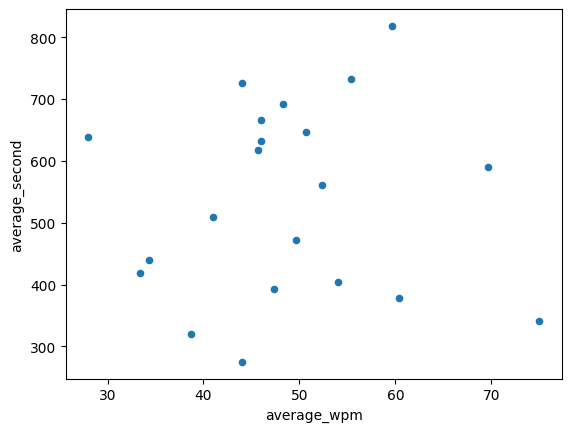

In [6]:
# check the distribution of data by plotting as scatter
new_df.plot(x='average_wpm', y='average_second', kind='scatter')	

# **Deklarasi Variabel**

In [7]:
# define x and y by using the new dataframe
x = new_df['average_wpm'].values.reshape(-1, 1)
y = new_df['average_second'].values.reshape(-1, 1)

# **NORMALISASI** 
### _'average_wpm' dan 'average_second'_

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
#Normalize x variabel
scalar = MinMaxScaler()
scalar.fit(x)
new_x = scalar.transform(x)
new_x

array([[0.68794326],
       [0.27659574],
       [0.5177305 ],
       [0.22695035],
       [0.        ],
       [0.58156028],
       [0.41134752],
       [0.55319149],
       [0.67375887],
       [0.34042553],
       [0.38297872],
       [0.37588652],
       [0.11347518],
       [0.88652482],
       [0.13475177],
       [0.38297872],
       [0.46099291],
       [0.34042553],
       [0.43262411],
       [0.4822695 ],
       [1.        ]])

In [10]:
#Normalize y variabel
scalar = MinMaxScaler()
scalar.fit(y)
new_y = scalar.transform(y)
new_y

array([[0.18910964],
       [0.43046358],
       [0.52538631],
       [0.08425313],
       [0.67071376],
       [0.84179544],
       [0.21596762],
       [0.23657101],
       [1.        ],
       [0.        ],
       [0.72111847],
       [0.63208241],
       [0.26526858],
       [0.58130979],
       [0.30279617],
       [0.65746873],
       [0.36387049],
       [0.82928624],
       [0.76637233],
       [0.68322296],
       [0.1214128 ]])

# **Split *Data Train* dan *Data Test***

In [11]:
# Bagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=31)

# **Membuat Model**

In [12]:
# create a linear regression model
model = LinearRegression()

# **Training Data**

In [13]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train, y_train)  

LinearRegression()

# **Prediksi Model**

In [14]:
# make predictions using test data
y_pred = model.predict(x_test)

In [15]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

MSE -->  0.08532950027251174
RMSE -->  0.29211213646904804
MAE -->  0.2751778498310933
R2 -->  0.00023667469430943555


# **Data Visualisasi**

Text(0, 0.5, 'Predicted')

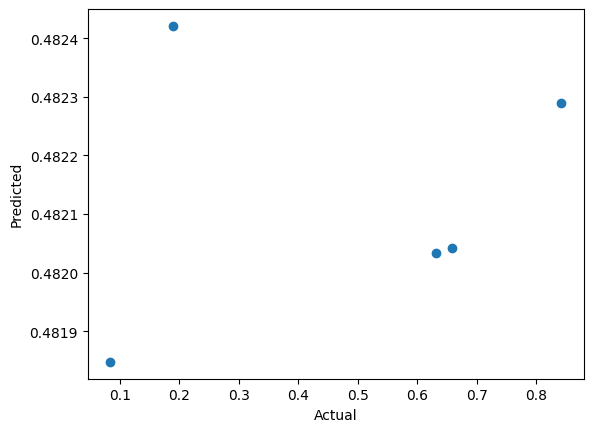

In [16]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

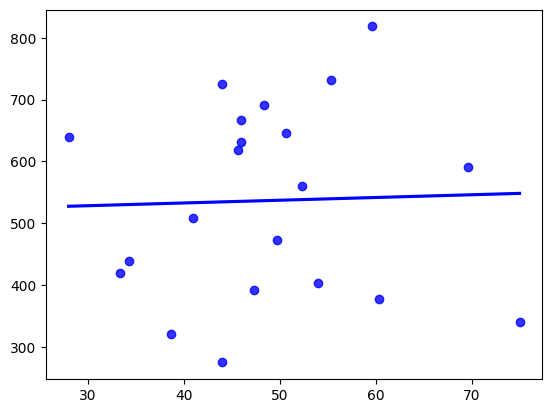

In [17]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

# **Membuat Input**

In [18]:
input_data = np.array([[79]])

prediction = model.predict(input_data)
denormalized_prediction = scalar.inverse_transform(prediction)

print('Estimasi kecepatan waktu : ', prediction)

Estimasi kecepatan waktu :  [[0.57987394]]


# **Save Model**

In [19]:
import pickle

filename = 'estimasi_waktu_lr.sav'
pickle.dump(model,open(filename,'wb'))

with open('y.pickle', 'wb') as file:
    pickle.dump(y, file)
